## 特征工程之特征选择（二）
### 2. Wrapper Method
包装特征选择算法

#### 2.1递归式（或称循环式）特征消除(Recursive Feature Elimination, RFE)
**1.** RFE是一种基于一种机器算法模型如Logistic Regression, SVM等模型进行多轮训练，每次训练都会消除一些特征，然后再从剩下的特征中在重重的训练和消除不中的特征。在这里对特征子集进行高效的搜索，从而找到了最好的子集。<br>
**2.** 但是搜索出来的特征子集的质量，大部分的时候也要依靠进行特征搜索的基线模型，如普通的回归算法可能在搜索的过程中并非稳定，但是如果使用Ridge岭回归或者其他加入了正则化的模型，就会稳定很多。<br>

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

In [3]:
# 观察下digits手写字的数据集,是一个8x8的灰度图
digits.images.shape

(1797, 8, 8)

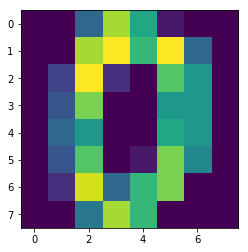

In [4]:
plt.imshow(digits.images[0])
plt.show()

In [5]:
# 将其转化为二维格式，即(1797, 64)，即每一个样本的特征数为64个特征。
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

In [6]:
X.shape, y.shape

((1797, 64), (1797,))

In [7]:
# 接下来我们使用线性合函数的SVC进行特征子集的搜索
svc = SVC(kernel='linear')
# n_features_to_select: 每次选择的特征的数量，如果为None,则选择一半
# step: 如果step>=1，则对应于要移除的step特征数量，如果小于1，则移除百分比step的特征数量
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)  
rfe.fit(X, y)

RFE(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
  n_features_to_select=1, step=1, verbose=0)

In [8]:
rfe.n_features_to_select

1

In [9]:
rfe.ranking_.shape

(64,)

In [10]:
# 特征排名
rfe.ranking_

array([64, 50, 31, 23, 10, 17, 34, 51, 57, 37, 30, 43, 14, 32, 44, 52, 54,
       41, 19, 15, 28,  8, 39, 53, 55, 45,  9, 18, 20, 38,  1, 59, 63, 42,
       25, 35, 29, 16,  2, 62, 61, 40,  5, 11, 13,  6,  4, 58, 56, 47, 26,
       36, 24,  3, 22, 48, 60, 49,  7, 27, 33, 21, 12, 46])

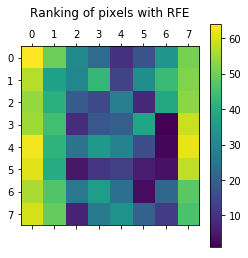

In [11]:
# 绘画出像素/特征排名图
plt.matshow(rfe.ranking_.reshape(digits.images[0].shape))  # 恢复为8x8shape的图像，更好观察
plt.colorbar()
plt.title("Ranking of pixels with RFE\n")
plt.show()

## 从以上图可以看出，靠近于居中位置的特征更显得重要点，即说明手写字居中的特征更加重要，周边的特征像素显得不那么重要。